In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = None
        theta[c,g] = None


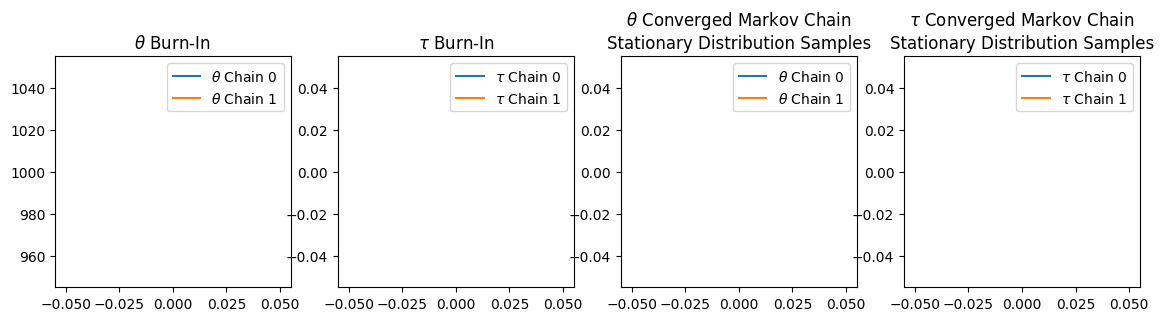

In [4]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();

### 4. How will you provide Bayesian inference for $\theta$ given sample $\textbf{x}$?<br>Let's


In [ ]:
# Yes, let's


# Homework

---

### Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*





In [17]:
# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        alp = n / 2
        beta = 0.5 * np.sum((x - theta[c, g - 1])**2)
        tau[c, g] = stats.gamma(a=alp, scale=1 / beta).rvs()

        mu_n = np.mean(x)
        sig_n_sqrd = 1 / (n * tau[c, g])
        theta[c, g] = stats.norm(loc=mu_n, scale=np.sqrt(sig_n_sqrd)).rvs()


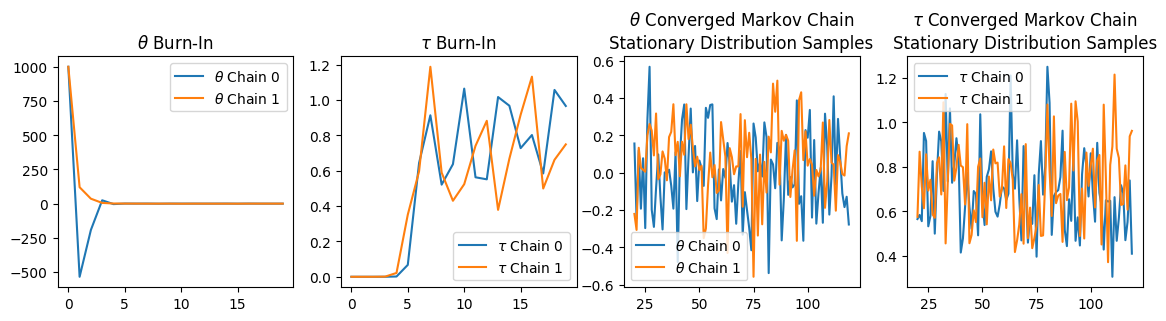

In [22]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();

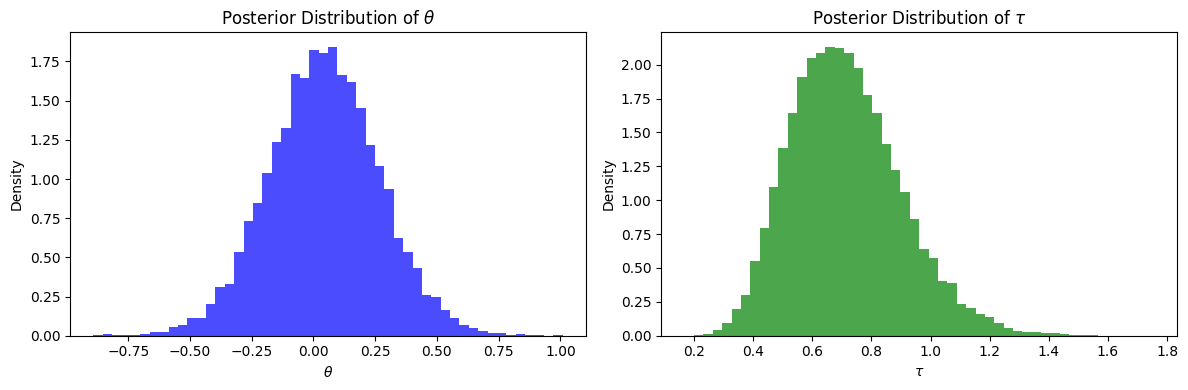

95% Credibility Interval for $\theta$: [-0.39108251  0.48384029]
95% Credibility Interval for $\tau$: [0.39965621 1.12446558]


In [23]:
# Histogram and credibility intervals
burn_in = 30  # Remove initial samples for burn-in
posterior_theta = theta[:, burn_in:].flatten()
posterior_tau = tau[:, burn_in:].flatten()

# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(posterior_theta, bins=50, density=True, alpha=0.7, color='blue')
ax[0].set_title("Posterior Distribution of $\\theta$")
ax[0].set_xlabel("$\\theta$")
ax[0].set_ylabel("Density")

ax[1].hist(posterior_tau, bins=50, density=True, alpha=0.7, color='green')
ax[1].set_title("Posterior Distribution of $\\tau$")
ax[1].set_xlabel("$\\tau$")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Credibility intervals
credibility_theta = np.percentile(posterior_theta, [2.5, 97.5])
credibility_tau = np.percentile(posterior_tau, [2.5, 97.5])

print("95% Credibility Interval for $\\theta$:", credibility_theta)
print("95% Credibility Interval for $\\tau$:", credibility_tau)

### Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$.

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively.

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*

Full Conditional Distribution of $p(\theta \mid \tau, X)$:

\begin{align*}
p(\theta \mid \tau, X) &\propto p(X \mid \theta)p(\theta) \\
p(\theta) &= \sqrt{\frac{\tau_0}{2\pi}} \, e^{-\frac{\tau_0}{2} (\theta - \theta_0)^2} \\
&\propto e^{-\frac{\tau_0}{2} (\theta^2 - 2\theta\theta_0 + \theta_0^2)} \\
\\
p(X \mid \theta, \tau) &= \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} \, e^{-\frac{\tau}{2} (x_i - \theta)^2} \\
&\propto e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2} \\
&= e^{-\frac{\tau}{2} (n\theta^2 - 2n\theta \bar{x})} \\
&= e^{-\frac{\tau n}{2} (\theta^2 - 2\theta \bar{x})} \\
\\
p(X \mid \theta)p(\theta) &\propto \exp\left\{-\frac{1}{2}\left[\tau n (\theta^2 - 2\theta \bar{x}) + \tau_0 (\theta^2 - 2\theta \theta_0)\right]\right\} \\
&= \exp\left\{-\frac{1}{2}\left[\theta^2 (\tau n + \tau_0) - 2\theta (n\tau \bar{x} + \tau_0 \theta_0)\right]\right\} \\
&= \exp\left\{-\frac{1}{2} \frac{\tau n + \tau_0}{1} \left[\theta^2 - 2\theta \frac{n\tau \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0}\right]\right\} \\
\text{Let } &\left[\theta^2 - 2\theta \frac{n\tau \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0}\right] \text{ be } \tilde{\theta} \\
&= \exp\left\{-\frac{\tau n + \tau_0}{2} (\theta - \tilde{\theta})^2\right\} \\
\\
\theta &\sim N\left(\mu = \tilde{\theta} = \frac{n\tau \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0}, \sigma^2 = (\tau n + \tau_0)^{-1}\right).
\end{align*}

Full Conditional Distribution of $p(\theta \mid \tau, X)$:

\begin{align*}
p(\tau \mid \theta, X) &\propto P(X \mid \tau, \theta)P(\tau) \\
\\
P(\tau) &\propto \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2} \tau} \\
\\
P(X \mid \theta, \tau) &= \prod_{i=1}^n \left(\frac{\tau}{2\pi}\right)^{1/2} e^{-\frac{\tau}{2} (x_i - \theta)^2} \\
&\propto \tau^{n/2} e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2} \\
\\
P(X \mid \tau, \theta)P(\tau) &\propto \tau^{n/2 + \frac{\alpha}{2} - 1} e^{-\frac{\tau}{2} \left[\sum_{i=1}^n (x_i - \theta)^2 + \lambda\right]} \\
&= \tau^{\frac{1}{2}(n + \alpha) - 1} e^{-\tau \cdot \frac{1}{2} \left[\sum_{i=1}^n (x_i - \theta)^2 + \lambda\right]} \\
\\
\tau &\sim \text{Gamma}\left(\alpha = \frac{1}{2}(n + \alpha), \, \text{Scale} = \frac{1}{2} \left[\sum_{i=1}^n (x_i - \theta)^2 + \lambda\right]^{-1}\right).
\end{align*}

Discussion:

𝛼 Controls the shape of the prior. Larger 𝛼 means the prior is more concentrated and 'stronger'.

𝜆 Scales the prior. Meaning, it controls the precision of the prior about $\tau$

From the derivation above, the posterior shape parameter becomes:

$𝛼_{post} = \frac{1}{2}(n + 𝛼)$

, where n is the number of data points from the likelihood, and α is the contribution from the prior. \\

The posterior rate parameter becomes:

$λ_{post} = \frac{1}{2}[Σ^{n}_{i=1}(x_i - θ) + λ]$

, where the prior's contribution (λ) is added to the sum of squared deviations from the data.

The relative influence of the prior and the likelihood depends on their magnitudes:

**A Strong Prior** occurs when α is large and λ is small. The prior will dominate the posterior, effectively shrinking the posterior distribution toward the prior mean.

**A Weak Prior** occurs when α small and λ is large. The likelihood will dominate, and the posterior is more influenced by the data.


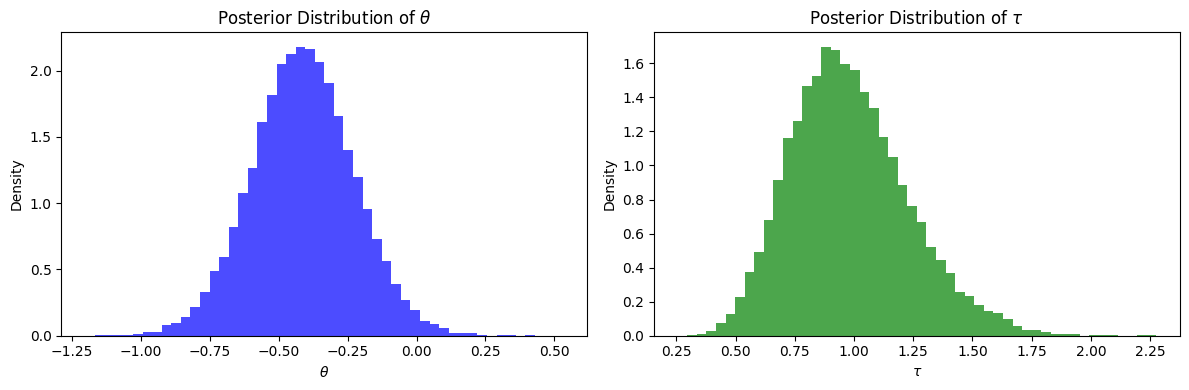

95% Credibility Interval for $\theta$: [-0.77318015 -0.04803742]
95% Credibility Interval for $\tau$: [0.55709413 1.53369886]


In [5]:
def gibbs_sampler(n, x, theta_0, tau_0, alpha, lambda_param, C=2, G=10000, burn=500):
    # Initialize arrays for theta and tau
    theta, tau = np.zeros([C, G]), np.zeros([C, G])
    theta[:, 0] = 0
    tau[:, 0] = 1

    for c in range(C):
        for g in range(1, G):
            # Update tau
            alp = alpha / 2 + n / 2  # Shape parameter
            beta = lambda_param / 2 + 0.5 * np.sum((x - theta[c, g - 1]) ** 2)  # Rate parameter
            tau[c, g] = stats.gamma(a=alp, scale=1 / beta).rvs()

            # Update theta
            mu_n = (np.sum(x) + tau_0 * theta_0) / (n + tau_0)
            sig_n_sqrd = 1 / (n * tau[c, g] + tau_0)
            theta[c, g] = stats.norm(loc=mu_n, scale=np.sqrt(sig_n_sqrd)).rvs()

    # Return posterior samples after burn-in
    posterior_theta = theta[:, burn:].flatten()
    posterior_tau = tau[:, burn:].flatten()
    return posterior_theta, posterior_tau

# Example usage with default parameters
n = 30
x = stats.norm(loc=0, scale=1).rvs(size=n)

# Hyperparameters
theta_0 = 0  # Prior mean for theta
tau_0 = 1   # Prior precision for theta
alpha = 2    # Shape parameter for tau
lambda_param = 2  # Rate parameter for tau

# Run the Gibbs sampler function
posterior_theta, posterior_tau = gibbs_sampler(n, x, theta_0, tau_0, alpha, lambda_param)

# Visualization of posterior distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(posterior_theta, bins=50, density=True, alpha=0.7, color='blue')
ax[0].set_title("Posterior Distribution of $\\theta$")
ax[0].set_xlabel("$\\theta$")
ax[0].set_ylabel("Density")

ax[1].hist(posterior_tau, bins=50, density=True, alpha=0.7, color='green')
ax[1].set_title("Posterior Distribution of $\\tau$")
ax[1].set_xlabel("$\\tau$")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Credibility intervals
credibility_theta = np.percentile(posterior_theta, [2.5, 97.5])
credibility_tau = np.percentile(posterior_tau, [2.5, 97.5])

print("95% Credibility Interval for $\\theta$:", credibility_theta)
print("95% Credibility Interval for $\\tau$:", credibility_tau)

Here, I changed the hyperparameter values to output different prior distrbutions.

Changing the hyperparameter values changes the effects the prior and likelihood have on the posterior. For example: a large theta_0 value shifts toward the posterior mean towards the theta_0 prior mean.


### Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then the posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and beside the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality (if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far for you) is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.



If the prior is a proper distribution, then the posterior is proportional to the joint distribution as Bayes' Theorem indicates. Here's the reasoning and process:

**Bayes' Theorem Framework:**

$p(θ∣x)= \frac{p(x∣θ)p(θ)}{p(x)}$


Since p(x) (evidence) is a constant with respect to θ, the posterior p(θ∣x) is proportional to the product of the likelihood p(x∣θ) and the prior p(θ):

$p(θ∣x)∝p(x∣θ)p(θ)$

**Exact Distribution Identification:**
To determine the exact posterior distribution, recognize the functional form of the joint (likelihood X prior). In cases where the prior is conjugate to the likelihood (as in the Beta prior and Bernoulli/Binomial likelihood), the posterior will belong to the same distribution family. For example:

*   Prior: $Beta(a,b)$
*   Likelihood: $Binomial(n,θ)$
*   Posterior: $Beta(a+∑_{i}x_i​,b+n−∑_ix_i)$

**Why It's Moot in Practice:**
As Bayesians, we do not focus on deriving posterior distributions. Instead, we rely on sampling methods to generate samples from the posterior distribution. These samples enable us to:

Create histograms, calculate credible intervals, and make probability statements about parameters. Thus, the exact functional form of the posterior is not critical in practice since Bayesian inference emphasizes beliefs derived from sampled distributions rather than analytic derivations.